## Retail Analytics

The dataset is of online retail from Machine Learning Repository at UCI. 
https://archive.ics.uci.edu/ml/datasets/online+retail

It is a trans-national transactions dataset between 01/12/2010 and 09/12/2011 for a registered online retail based in UK. It sells unique gifts for all occasions. The majority of the customers are wholesalers. 

Following is the description of the data:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code distinct for every product. 

Description: Product (item) name.

Quantity: The quantities of each product per transaction. Numeric.

InvoiceDate: Invice Date and time. the day and time when each transaction was generated.

UnitPrice: Unit price of a product. Numeric, Product price per unit in sterling.

CustomerID: Customer number unique to each customer. 

Country: The name of the country where each customer resides.


#### Analysis of the data will be done to 
The data will be analyzed to understand retail math including inventory turn, average price, revenue generation and calculating margin. IT will also be used to identify trends in the revenue generation by the number of orders and analyzing when the dips happen.  

#### Importing the libraries

In [1]:
from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

In [2]:
import plotly.offline as py

import plotly.offline as pyoff

py.init_notebook_mode(connected=False)
import plotly.graph_objs as go


ModuleNotFoundError: No module named 'plotly'

#### Reading the data

In [47]:
#reading an excel file
data = pd.read_excel('Online Retail.xlsx')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


There are 541909 entries across the various features. 

There is always a single metric that best captures the value delivered to the customers. This is called north star metrics. In this case, monthly revenue generated is the north star metric. 

We will also analyze the overall revenue. 

#### Revenue
Active Customer Count 
Order Count 
Average Revenue per Order

In [50]:
#converting to data time format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [51]:
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year +  date.month)
data['InvoiceYearMonth'].head()

0    201012
1    201012
2    201012
3    201012
4    201012
Name: InvoiceYearMonth, dtype: int64

In [52]:
#creating a new column revenue and then grouping by the month/time of the order placed
data['Revenue'] = data['Quantity']*data['UnitPrice']
revenue_per_month =  data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

#analyzing revenue per month
revenue_per_month

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Analysing revenue per month

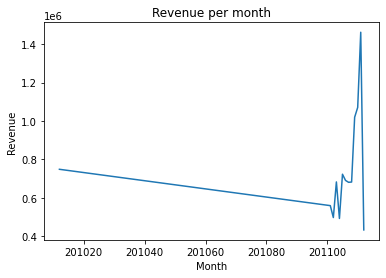

In [56]:
plt.plot(revenue_per_month['InvoiceYearMonth'],revenue_per_month['Revenue'])
plt.title('Revenue per month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

Revenue percent change per month

In [57]:
#checking the difference with the previous month
revenue_per_month['MonthlyGrowth'] = revenue_per_month['Revenue'].pct_change()
revenue_per_month

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


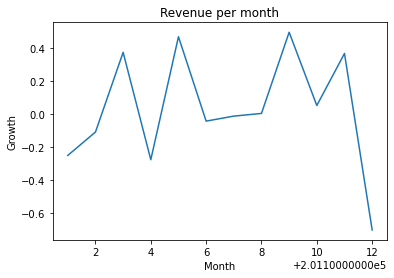

In [58]:
plt.plot(revenue_per_month['InvoiceYearMonth'],revenue_per_month['MonthlyGrowth'])
plt.title('Revenue per month')
plt.xlabel('Month')
plt.ylabel('Growth')
plt.show()

April has 27% dip in revenue . We also see a big decline in December of 70%. We now have to analyze

Monthly Active Customers, 
Monthly Order Count, 
Average Revenue Per Order,
New customer Ratio,
Monthly Retention Rate

#### Working on UK data

In [59]:
data.groupby('Country')['InvoiceNo'].count()
# data.query("Country=='United Kingdom'")

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


In [60]:
data_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


#### Monthly Active Customers

In [61]:
monthly_active = data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


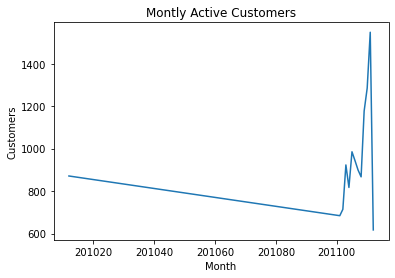

In [62]:
plt.plot(monthly_active['InvoiceYearMonth'],monthly_active['CustomerID'])
plt.title('Montly Active Customers')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.show()

As we saw that the revenue dropped suddenly in April 2011. We also see that there is a drop in number of active customers in April 2011

#### Monthly Order Count

In [63]:
monthly_order_count = data_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
monthly_order_count

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


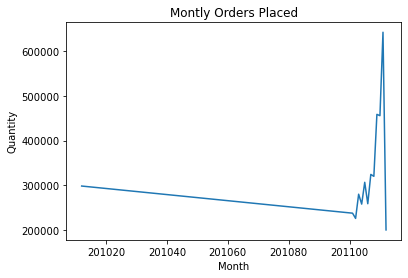

In [64]:
plt.plot(monthly_order_count['InvoiceYearMonth'],monthly_order_count['Quantity'])
plt.title('Montly Orders Placed')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

#### Average Revenue Per Order

In [66]:
avg_revenue_per_order = data_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
avg_revenue_per_order.head()

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380


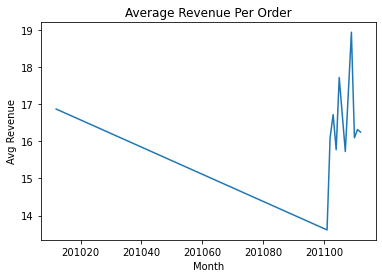

In [68]:
plt.plot(avg_revenue_per_order['InvoiceYearMonth'],avg_revenue_per_order['Revenue'])
plt.title('Average Revenue Per Order')
plt.xlabel('Month')
plt.ylabel('Avg Revenue')
plt.show()

We see that average revenue also spiked because the number of orders were increasing at the same time. 

#### analyzing unit price

In [70]:
avg_price_per_order = data_uk.groupby('InvoiceYearMonth')['UnitPrice'].mean().reset_index()
avg_price_per_order.head()

,InvoiceYearMonth,UnitPrice
0,201012,6.278452
1,201101,4.967151
2,201102,4.655607
3,201103,4.351095
4,201104,3.810339


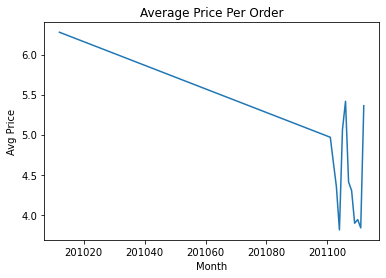

In [71]:
plt.plot(avg_price_per_order['InvoiceYearMonth'],avg_price_per_order['UnitPrice'])
plt.title('Average Price Per Order')
plt.xlabel('Month')
plt.ylabel('Avg Price')
plt.show()

#### Revenue per Month - New vs Existing Customer

In [72]:
min_purchase =  data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns=['CustomerID','min_purchase_date']

In [73]:
min_purchase['min_purchase_monthyear']= min_purchase['min_purchase_date'].map(lambda date: 100*date.year + date.month)

In [74]:
min_purchase.head()

,CustomerID,min_purchase_date,min_purchase_monthyear
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [75]:
data_uk = pd.merge(data_uk,min_purchase,on='CustomerID')

In [76]:
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,min_purchase_date,min_purchase_monthyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [77]:
data_uk['user_type'] = 'New'
data_uk.loc[data_uk['InvoiceYearMonth']>data_uk['min_purchase_monthyear'],'user_type'] = 'Existing'

revenue_usertype = data_uk.groupby(['InvoiceYearMonth','user_type'])['Revenue'].sum().reset_index()

revenue_usertype = revenue_usertype.query('InvoiceYearMonth != 201012 and InvoiceYearMonth!= 201112')

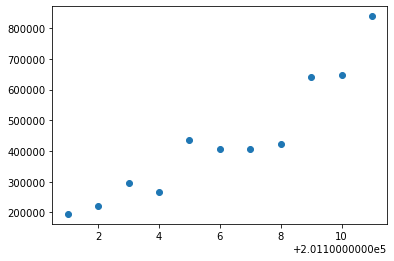

In [86]:
plt.scatter( x = revenue_usertype.query("user_type == 'Existing'")['InvoiceYearMonth'],
    y = revenue_usertype.query("user_type == 'Existing'")['Revenue'])
#plt.title('Average Price Per Order')
#plt.xlabel('Month')
#plt.ylabel('Avg Price')
plt.show()

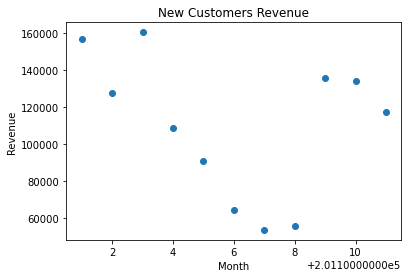

In [88]:
plt.scatter( x = revenue_usertype.query("user_type == 'New'")['InvoiceYearMonth'],
    y = revenue_usertype.query("user_type == 'New'")['Revenue'])
plt.title('New Customers Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

As seen from the graph above the Revenue generated per month from the new customers fell significanlty from 2011-04

#### New Customer Ratio

In [87]:
user_ratio = data_uk.query("user_type == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/data_uk.query("user_type == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
user_ratio = user_ratio.reset_index()
user_ratio = user_ratio.dropna()


user_ratio.head()

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793


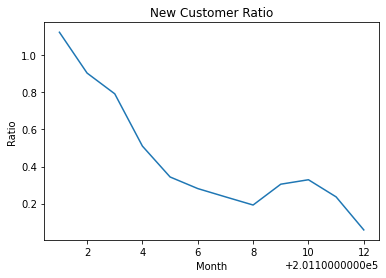

In [89]:
plt.plot(user_ratio['InvoiceYearMonth'],user_ratio['CustomerID'])
plt.title('New Customer Ratio')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.show()

The ratio of new customers kept falling significantly since the beginning. 

#### Monthly Retention Rate

In [90]:
user_purchase = data_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
retention = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth']).reset_index()

retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [91]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = retention.columns[2:]

retention_array = []

for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount']/retention['TotalUserCount']

retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


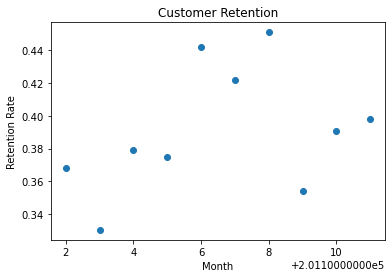

In [93]:
plt.scatter( x=retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=retention.query("InvoiceYearMonth<201112")['RetentionRate'])
plt.title('Customer Retention')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.show()

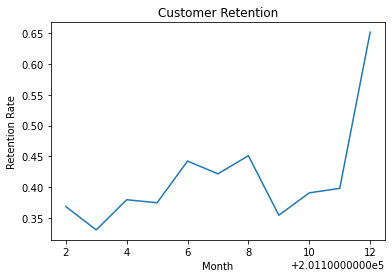

In [94]:
plt.plot( retention['InvoiceYearMonth'],
        retention['RetentionRate'])
plt.title('Customer Retention')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.show()

In [95]:
#Retention Rate by Monthly Cohort

retention = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth'])

retention.head()

InvoiceYearMonth,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
CustomerID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [98]:
new_column_names = [ 'm_' + str(column) for column in retention.columns]
retention.columns = new_column_names

retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
   
    prev_months = months[:i]
    next_months = months[i+1:]
    
    # setting the previous months less than selected months to NA as we will consider retention from selected month to next months
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    
    total_user_count =  retention_data['TotalUserCount'] = retention['m_' + str(selected_month)].sum()
    
    retention_data[selected_month] = 1 
    query = "{} > 0".format('m_' + str(selected_month))
    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

retention = pd.DataFrame(retention_array)
retention.index = months
retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,1.00,1.0,0.38,0.26,0.18,0.15,0.13,0.12,0.11,0.10,0.08,0.08,0.07
201102,1.38,NaN,1.00,0.55,0.35,0.29,0.25,0.22,0.20,0.18,0.15,0.14,0.12
201103,1.76,NaN,NaN,1.00,0.52,0.42,0.35,0.31,0.27,0.25,0.21,0.20,0.16
201104,1.92,NaN,NaN,NaN,1.00,0.69,0.54,0.46,0.40,0.37,0.31,0.29,0.23
201105,2.32,NaN,NaN,NaN,NaN,1.00,0.69,0.56,0.48,0.44,0.37,0.34,0.27
201106,2.60,NaN,NaN,NaN,NaN,NaN,1.00,0.72,0.60,0.54,0.45,0.42,0.32
201107,2.87,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.75,0.66,0.54,0.50,0.38
201108,3.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.81,0.64,0.59,0.44
201109,3.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.74,0.67,0.48


In 1 year only 7% customers retain with us.